# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [4]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

0.001 22
0.01 22
0.1 22
0.0 22
1.0 21
10.0 12
100.0 7
1000.0 7


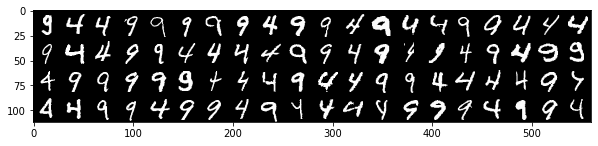

In [5]:
show_digit(X)
# Do feature normalization here
# begin answer
mean = np.mean(X,axis=1,keepdims=True)
std = np.std(X,axis=1,keepdims=True)
std[std==0] = 1e-9
X = (X - mean)/std

# end answer
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1) 
        w = ridge(X_, y_, lmbdas[i])
        E_val = E_val + int(np.dot(w.T, np.hstack((1, X[:,j])))*y[:,j] < 0)
    print(lmbdas[i], E_val)
    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer
    


In [6]:
w1 = ridge(X, y, 100)
w2 = ridge(X, y, 0)
print(np.dot(w1.T, w1), np.dot(w2.T, w2))

[[0.13289524]] [[1.0204767]]


In [7]:
# Compute training error
w = ridge(X, y, lmbda)
y_pred = np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X)))
train_error = np.sum(y_pred*y < 0) / X.shape[1]
print(train_error)
# Do feature normalization to X_test, y_test
mean = np.mean(X_test,axis=1,keepdims=True)
std = np.std(X_test,axis=1,keepdims=True)
std[std==0] = 1e-9
X_test = (X_test - mean)/std
# Compute test error
y_pred = np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
test_error = np.sum(y_pred*y_test < 0) / X_test.shape[1]
print(test_error)

# without lmbda
w = ridge(X, y, 0)
y_pred = np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X)))
train_error = np.sum(y_pred*y < 0) / X.shape[1]
print(train_error)
# Do feature normalization to X_test, y_test
mean = np.mean(X_test,axis=1,keepdims=True)
std = np.std(X_test,axis=1,keepdims=True)
std[std==0] = 1e-9
X_test = (X_test - mean)/std
# Compute test error
y_pred = np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
test_error = np.sum(y_pred*y_test < 0) / X_test.shape[1]
print(test_error)

0.0
0.05976896032144651
0.0
0.12606730286288298


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [8]:
from logistic_r import logistic_r
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1) 
        w = logistic_r(X_, y_, lmbdas[i])
        E_val = E_val + int(np.dot(w.T, np.hstack((1, X[:,j])))*y[:,j] < 0)
    print(lmbdas[i], E_val)
    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
        

0.001 29
0.01 29
0.1 29
0.0 29
1.0 29
10.0 29
100.0 29
1000.0 29
0.105
0.12305374183827222


In [12]:
# Compute training error
w = logistic_r(X, y, lmbda)
y_pred = np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X)))
train_error = np.sum(y_pred*y < 0) / X.shape[1]
print(train_error)
# Do feature normalization to X_test, y_test
mean = np.mean(X_test,axis=1,keepdims=True)
std = np.std(X_test,axis=1,keepdims=True)
std[std==0] = 1e-9
X_test = (X_test - mean)/std
# Compute test error
y_pred = np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
test_error = np.sum(y_pred*y_test < 0) / X_test.shape[1]
print(test_error)

# without lmbda
w = logistic_r(X, y, 0)
y_pred = np.dot(w.T, np.vstack((np.ones((1, X.shape[1])), X)))
train_error = np.sum(y_pred*y < 0) / X.shape[1]
print(train_error)
# Do feature normalization to X_test, y_test
mean = np.mean(X_test,axis=1,keepdims=True)
std = np.std(X_test,axis=1,keepdims=True)
std[std==0] = 1e-9
X_test = (X_test - mean)/std
# Compute test error
y_pred = np.dot(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))
test_error = np.sum(y_pred*y_test < 0) / X_test.shape[1]
print(test_error)

0.105
0.12305374183827222
0.105
0.12305374183827222
